In [ ]:
## Tarea 5
# Yasuo Ignacio Maidana Perez
1 One hot encoding se refiere a la asignacion de banderas de encendido o apagado a variables categoricas
mediante una matriz en donde hay tantas columnas como objetos categoricos y se le asignauna posicion, cada columna
tiene 0 y 1 dependiendo de la variable que contenga
https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/#:~:text=One%20Hot%20Encoding%20%E2%80%93%20It%20refers%20to%20splitting,corresponding%20to%20which%20column%20it%20has%20been%20placed.


In [68]:
#Basado en https://www.tutorialspoint.com/logistic_regression_in_python/logistic_regression_in_python_restructuring_data.htm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

In [8]:
datos = pd.read_csv('Titanic.csv')
datos

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [9]:
print('Tamaño antes de validar',len(datos))
datos=datos.dropna()
print('Tamaño  despues de validar',len(datos))

Tamaño antes de validar 891
Tamaño  despues de validar 889


In [10]:
#Obteniendo nombres de columnas
print(list(datos.columns))
#df.drop(df.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], 
#   axis = 1, inplace = True)
#Si se tienen columnas que no sirven se quitan

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [12]:
#Hot Encoding
data = pd.get_dummies(datos, columns =['Sex', 'Embarked'])
data.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [21]:
#Crear matrices de salida y variables independientes
X = data.iloc[:,1:]
Y = data.iloc[:,:1]
print(X.head())
print(Y.head())

   Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3      1      0   7.2500           0         1           0   
1       1      1      0  71.2833           1         0           1   
2       3      0      0   7.9250           1         0           0   
3       1      1      0  53.1000           1         0           0   
4       3      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
   Survived
0         0
1         1
2         1
3         1
4         0


In [25]:
#Crea los vectores y matrices de entremaniento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [28]:
#Crea clasificador
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [29]:
classifier.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
X_test.head(1)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
14,3,0,0,7.8542,1,0,0,0,1


In [55]:
print(X_test.shape)
b=[(i)for i in X_test.columns]
print(b)
a=[[1,0,0,7.5,1,0,1,0,0]]
#d=[(i:j)for i j in zip(a,b)]
pr=pd.DataFrame(data=a,columns=b)
#print(pr.shape)


(223, 9)
['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [40]:
predicted_y = classifier.predict(X_test)
#Muestra los indices de quienes sobrevivieron segun el modelo
for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x, end="\t")

0	2	4	8	10	11	12	14	16	17	19	20	21	26	31	33	40	42	44	50	51	53	55	56	57	60	62	66	67	69	73	75	78	81	82	83	84	91	92	95	96	97	99	101	103	105	109	110	111	113	132	136	137	138	142	144	147	152	156	157	158	162	165	167	169	176	177	179	181	182	187	188	192	193	200	201	202	204	205	207	210	211	213	214	216	219	220	222	

In [31]:
#Verificando precision
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.75


In [57]:
survive = classifier.predict(pr)
if survive:
    print("La persona sobrevivio")
else:
    print("Press F")
        

La persona sobrevivio


# Problema 2

In [75]:
q1_data = pd.read_csv('q1_data.csv', header = None, names = ['A', 'B', 'C'])
q1_data.dropna()

,A,B,C
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0
...,...,...,...
995,0.728085,0.331500,1.0
996,0.394182,0.696147,1.0
997,0.996134,-0.087851,0.0
998,0.754392,0.266256,1.0


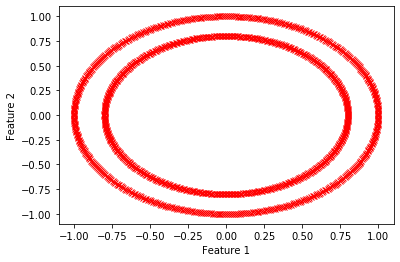

In [76]:
q1_data.isnull().values.any()
q1_data = q1_data.to_numpy()
X1 = q1_data[0:,0]
X2 = q1_data[0:,1]
Y = q1_data[0:,2]
features = q1_data[0:, 0:2]
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.plot(X1, X2,'rx')
plt.show()

Text(0.5, 0, 'Y')

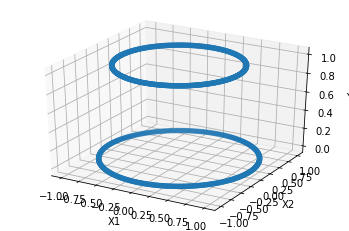

In [77]:
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y);
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [82]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features,Y,test_size=0.20)
LogisticRegression.fit(X_train, y_train)
classifier.fit(X_train, Y_train)
testing = LogisticRegression.predict(X_test)
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

TypeError: fit() missing 1 required positional argument: 'y'